In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency


In [2]:
data = pd.read_csv('./loan data/loan_data_2007_2014.csv')


/home/main/Documents/kazispaces/dsrc/py/finlytik-app/fin/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pd.options.display.max_columns = None
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
na_values = data.isnull().mean()
na_values[na_values>0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [6]:
data.drop(na_values[na_values>0.8].index, axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [8]:
data.drop(columns=['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                        'recoveries', 'total_rec_prncp', 'total_rec_late_fee'], inplace=True)


In [9]:
# explore the unique values in loan_status column
data['loan_status'].value_counts(normalize=True)


Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [10]:
# create a new column based on the loan_status column that will be our target variable
data['good_bad'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns=['loan_status'], inplace=True)


In [11]:
data['good_bad'].value_counts(normalize=True)

1    0.890693
0    0.109307
Name: good_bad, dtype: float64

In [12]:
X = data.drop('good_bad', axis=1)
y = data['good_bad']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
X_train, X_test = X_train.copy(), X_test.copy()

In [14]:
# create a helper function clean up the emp_length column, assign 0 to NANs, and convert to numeric
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value=0, inplace=True)


# apply to X_train
emp_length_converter(X_train, 'emp_length')

# Confirm our transformation
X_train['emp_length'].unique()

/tmp/ipykernel_949965/1995912987.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


array([ 7., 10.,  3.,  4.,  2.,  0.,  1.,  6.,  5.,  8.,  9.])

In [15]:
# convert date columns to datetime format and create a new column as a difference between today and the respective date
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2022-01-12')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format="%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' +
        column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' +
                                    column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns=[column], inplace=True)


# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

# let's check these new columns
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())


count    373003.000000
mean        291.293609
std          86.372742
min         122.000000
25%         232.000000
50%         274.000000
75%         334.000000
max         636.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    373028.000000
mean        100.252485
std          14.339074
min          85.000000
25%          90.000000
50%          96.000000
75%         106.000000
max         175.000000
Name: mths_since_issue_d, dtype: float64
count    372717.000000
mean         80.289989
std          12.803859
min          72.000000
25%          72.000000
50%          73.000000
75%          84.000000
max         169.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    372998.000000
mean         76.041810
std           9.630887
min          72.000000
25%          72.000000
50%          72.000000
75%          74.000000
max         176.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [16]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))


loan_term_converter(X_train, 'term')

In [17]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include='object').copy()
X_train_num = X_train.select_dtypes(include='number').copy()

In [18]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(
        pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature', []).append(column)
    chi2_check.setdefault('p-value', []).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data=chi2_check)
chi2_result.sort_values(by=['p-value'], ascending=True,
                        ignore_index=True, inplace=True)
chi2_result

,Feature,p-value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
3,purpose,0.000000
4,addr_state,0.000000
5,initial_list_status,0.000000
6,pymnt_plan,0.000923
7,application_type,1.000000


We'll keep only the top four categorical features

In [19]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace=True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data={'Numerical_Feature': X_train_num.columns.values,
                             'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(
    by=['F-Score'], ascending=False, ignore_index=True, inplace=True)
ANOVA_F_table

/home/main/Documents/kazispaces/dsrc/py/finlytik-app/fin/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/main/Documents/kazispaces/dsrc/py/finlytik-app/fin/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical_Feature,F-Score,p values
0,collection_recovery_fee,36791.724904,0.000000e+00
1,mths_since_last_pymnt_d,23513.805570,0.000000e+00
2,total_pymnt_inv,14784.534040,0.000000e+00
3,total_pymnt,14686.729567,0.000000e+00
4,int_rate,11462.788313,0.000000e+00
5,last_pymnt_amnt,10826.949727,0.000000e+00
6,out_prncp,9635.116160,0.000000e+00
7,out_prncp_inv,9633.442129,0.000000e+00
8,mths_since_last_credit_pull_d,7020.218888,0.000000e+00
9,mths_since_issue_d,2816.028871,0.000000e+00


<AxesSubplot:>

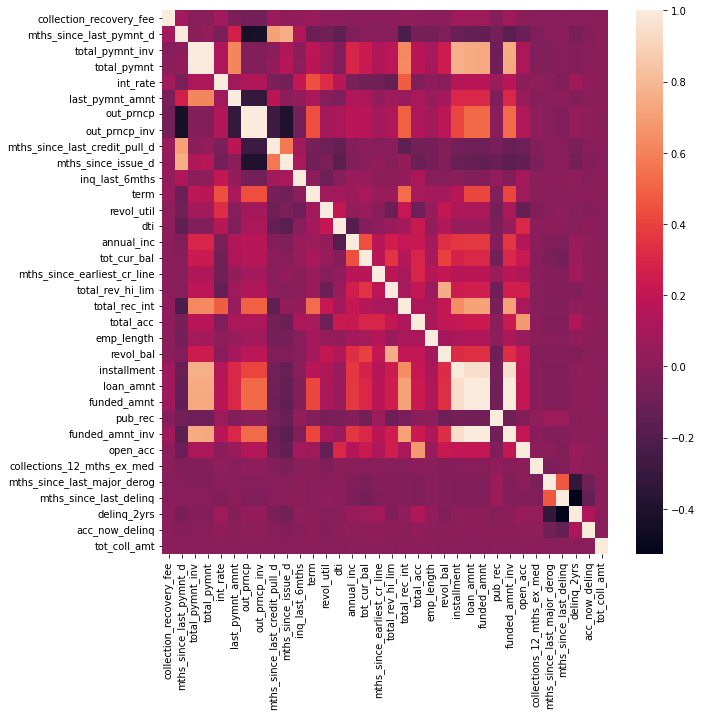

In [20]:
# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:34, 0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat)

we will keep only the top 21 features and ['pub_rec'] and drop ['total_rec_int','last_pymnt_amnt', 'total_pymnt_inv', 'total_rec_int', 'out_prncp_inv'] from the F-score ranking and correlation matrix(heatmap)

In [21]:
# Define a helper function to drop the 4 categorical features with least p-values for chi squared test, 14 numerical features with least F-Statistic
# and 2 numerical features with high multicollinearity
drop_columns_list = ANOVA_F_table.iloc[26:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
drop_columns_list.extend(['total_rec_int', 'last_pymnt_amnt',
                         'total_pymnt_inv', 'total_rec_int', 'out_prncp_inv', 'revol_bal', 'installment', 'loan_amnt', 'funded_amnt'])


def col_to_drop(df, columns_list):
    df.drop(columns=columns_list, inplace=True)


# apply to X_train
col_to_drop(X_train, drop_columns_list)


In [22]:
X_train.describe()

,term,int_rate,emp_length,annual_inc,dti,inq_last_6mths,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,collection_recovery_fee,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
count,373028.000000,373028.000000,373028.000000,3.730240e+05,373028.000000,373003.000000,373003.000000,372764.000000,373003.000000,373028.000000,373028.000000,373028.000000,3.168720e+05,3.168720e+05,373003.000000,373028.000000,372717.000000,372998.000000
mean,42.615847,13.833770,5.724313,7.334189e+04,17.222219,0.805288,0.160291,56.192328,25.069463,4409.242313,11540.311620,9.056067,1.390907e+05,3.040064e+04,291.293609,100.252485,80.289989,76.041810
std,10.724327,4.354663,3.754604,5.613241e+04,7.850161,1.093441,0.493895,23.728649,11.591832,6357.128699,8272.661827,86.278775,1.527400e+05,3.891130e+04,86.372742,14.339074,12.803859,9.630887
min,36.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,122.000000,85.000000,72.000000,72.000000
25%,36.000000,10.990000,2.000000,4.500000e+04,11.370000,0.000000,0.000000,39.300000,17.000000,0.000000,5550.586971,0.000000,2.867400e+04,1.350000e+04,232.000000,90.000000,72.000000,72.000000
50%,36.000000,13.660000,6.000000,6.300000e+04,16.870000,0.000000,0.000000,57.600000,23.000000,443.970000,9419.576549,0.000000,8.184450e+04,2.280000e+04,274.000000,96.000000,73.000000,72.000000
75%,60.000000,16.490000,10.000000,8.900000e+04,22.790000,1.000000,0.000000,74.700000,32.000000,7332.750000,15306.968130,0.000000,2.092708e+05,3.790000e+04,334.000000,106.000000,84.000000,74.000000
max,60.000000,26.060000,10.000000,7.500000e+06,39.990000,33.000000,49.000000,892.300000,156.000000,32160.380000,57777.579870,7002.190000,8.000078e+06,9.999999e+06,636.000000,175.000000,169.000000,176.000000


#### Update the test data set with all data cleaning procedures performed so far

In [23]:
emp_length_converter(X_test, 'emp_length')
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')
loan_term_converter(X_test, 'term')
col_to_drop(X_test, drop_columns_list)
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

/tmp/ipykernel_949965/1995912987.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [24]:
# Create copies of the 4 training sets to be preprocessed using WoE
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

In [25]:
pd.concat([X_train_prepr['grade'], y_train_prepr], axis=1)


,grade,good_bad
456615,A,1
451541,D,1
394474,D,1
110294,A,1
139343,B,0
...,...,...
163633,C,1
399306,B,1
57787,C,1
81641,C,1


In [26]:
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis=1)
    df_woe_iv = pd.crosstab(df[cat_variabe_name], df['good_bad'], normalize='columns').assign(
        woe=lambda dfx: np.log(dfx[1]/dfx[0])).assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0])))
    return df_woe_iv

In [27]:
# We set the default style of the graphs to the seaborn style.
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.index.astype(str))
    y = df_WoE['woe']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.index.name)
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.index.name))
    plt.xticks(rotation=rotation_of_x_axis_labels)


##### Grade

In [28]:
df_temp = woe_discrete(X_train_prepr, 'grade', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
grade,,,,
A,0.056678,0.173057,1.116232,0.292145
B,0.210723,0.303238,0.363975,0.292145
C,0.280865,0.267536,-0.048620,0.292145
D,0.233801,0.157049,-0.397915,0.292145
E,0.137097,0.069224,-0.683340,0.292145
F,0.062932,0.024198,-0.955774,0.292145
G,0.017904,0.005697,-1.144981,0.292145


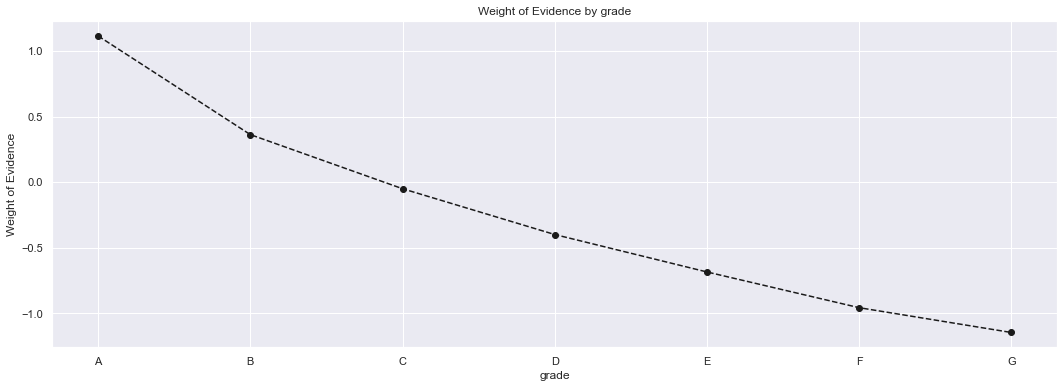

In [29]:
plot_by_woe(df_temp)

In [30]:
df_temp = woe_discrete(X_train_prepr, 'home_ownership', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
home_ownership,,,,
MORTGAGE,0.443714,0.513604,0.146272,0.02166
NONE,0.000147,0.000105,-0.334267,0.02166
OTHER,0.000809,0.000379,-0.758081,0.02166
OWN,0.089591,0.089269,-0.003605,0.02166
RENT,0.465738,0.396642,-0.160588,0.02166


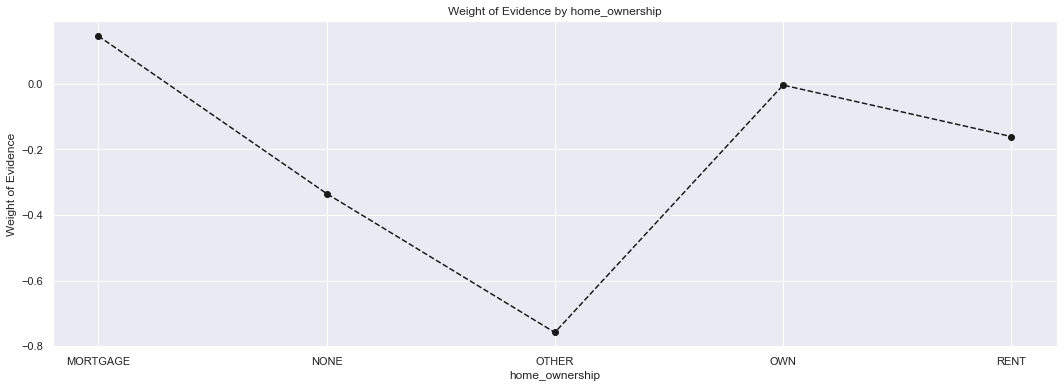

In [31]:
plot_by_woe(df_temp)


##### Verification Status

In [32]:
df_temp = woe_discrete(X_train_prepr, 'verification_status', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
verification_status,,,,
Not Verified,0.270883,0.323376,0.177128,0.022522
Source Verified,0.306813,0.323424,0.052726,0.022522
Verified,0.422303,0.353200,-0.178691,0.022522


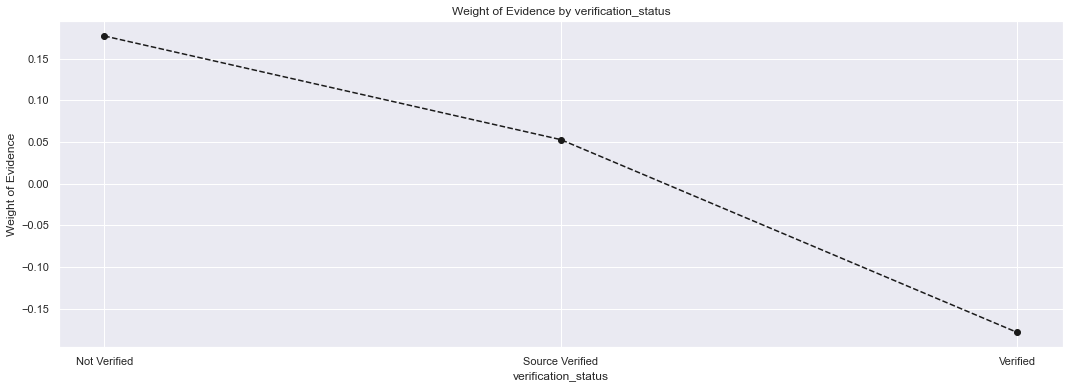

In [33]:
plot_by_woe(df_temp)


##### Purpose

In [34]:
df_temp = woe_discrete(X_train_prepr, 'purpose', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
purpose,,,,
car,0.009246,0.011645,0.230651,0.036668
credit_card,0.176117,0.229186,0.263385,0.036668
debt_consolidation,0.609065,0.584980,-0.040346,0.036668
educational,0.001790,0.000837,-0.760693,0.036668
home_improvement,0.051283,0.057673,0.117432,0.036668
house,0.006205,0.004728,-0.271777,0.036668
major_purchase,0.018296,0.021450,0.159065,0.036668
medical,0.012557,0.009746,-0.253469,0.036668
moving,0.008903,0.006122,-0.374498,0.036668


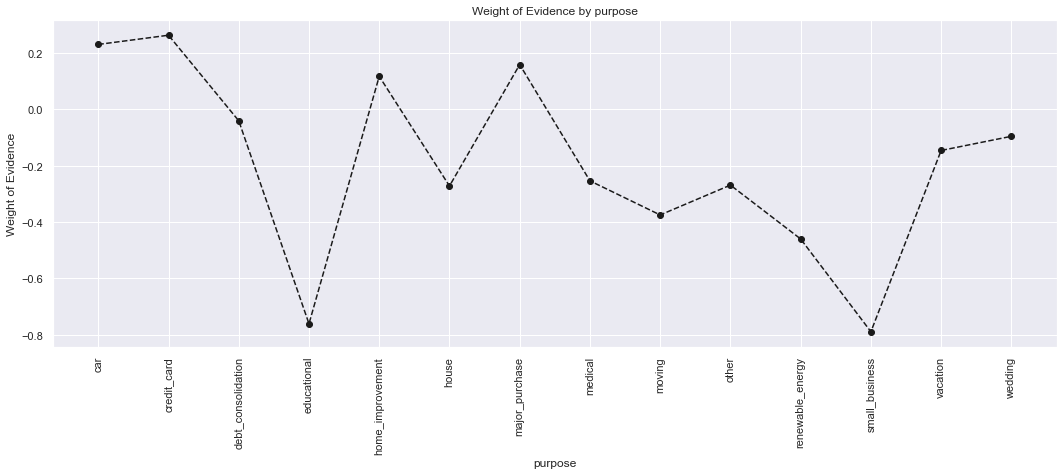

In [35]:
plot_by_woe(df_temp, 90)

##### Analyze WoEs and IVs of numeric features

##### term

In [36]:
df_temp = woe_discrete(X_train_prepr, 'term', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
term,,,,
36,0.641217,0.73454,0.135876,0.040794
60,0.358783,0.26546,-0.301254,0.040794


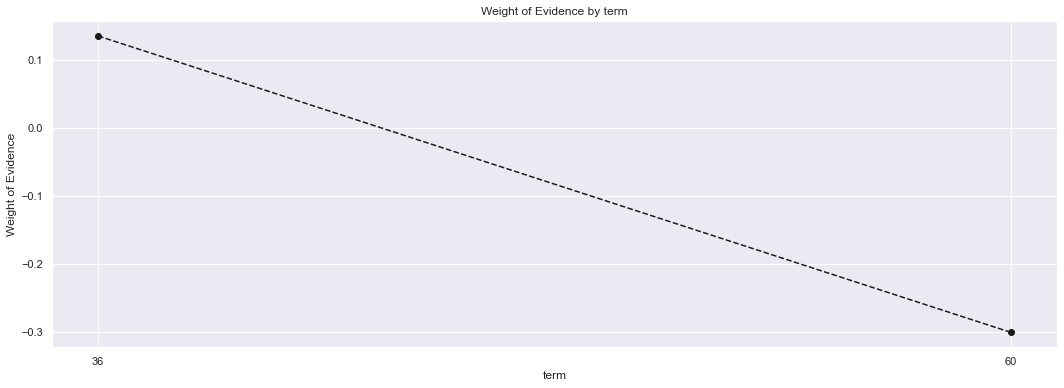

In [37]:
plot_by_woe(df_temp)


In [38]:
# fine-classing using the 'cut' method, given the large number of unique values
X_train_prepr['int_rate_factor'] = pd.cut(X_train_prepr['int_rate'], 50)
# Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_discrete(
    X_train_prepr, 'int_rate_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
int_rate_factor,,,,
"(5.399, 5.833]",0.000711,0.002248,1.150914,0.346603
"(5.833, 6.246]",0.004267,0.024782,1.759117,0.346603
"(6.246, 6.658]",0.005543,0.022922,1.419616,0.346603
"(6.658, 7.071]",0.001324,0.005186,1.364983,0.346603
"(7.071, 7.484]",0.001864,0.009360,1.613790,0.346603
"(7.484, 7.897]",0.011184,0.036520,1.183419,0.346603
"(7.897, 8.31]",0.011993,0.027663,0.835762,0.346603
"(8.31, 8.722]",0.005714,0.019362,1.220303,0.346603
"(8.722, 9.135]",0.014347,0.027067,0.634735,0.346603


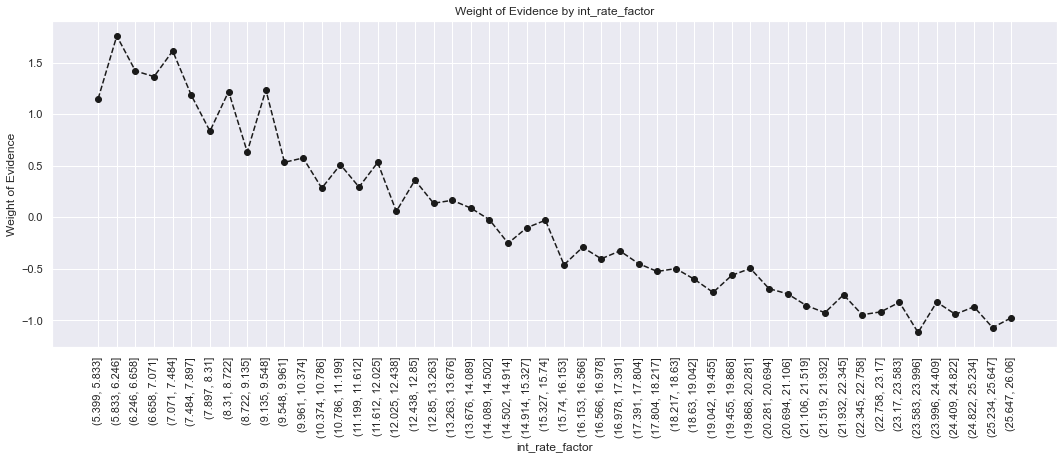

In [39]:
plot_by_woe(df_temp, 90)

##### emp_length

In [40]:
df_temp = woe_discrete(X_train_prepr, 'emp_length', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
emp_length,,,,
0.0,0.138618,0.120727,-0.138189,0.006408
1.0,0.064625,0.063045,-0.024743,0.006408
2.0,0.089444,0.088715,-0.008184,0.006408
3.0,0.078383,0.078569,0.002372,0.006408
4.0,0.059768,0.060330,0.009357,0.006408
5.0,0.069309,0.065697,-0.053524,0.006408
6.0,0.060382,0.055966,-0.075936,0.006408
7.0,0.057635,0.055632,-0.035365,0.006408
8.0,0.048487,0.047801,-0.014249,0.006408


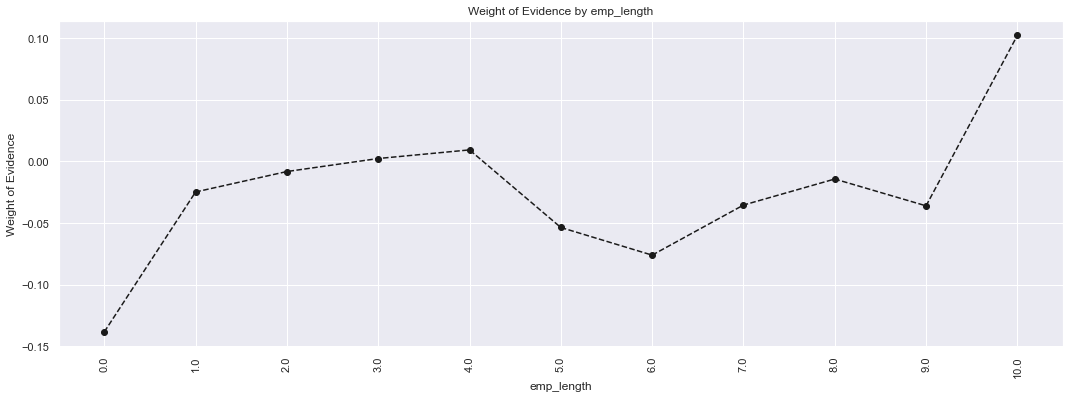

In [41]:
plot_by_woe(df_temp, 90)

The emp_length feature seems like very important but its IV value is useless. Therefore it will be dropped.

##### Annual_inc_factor

In [42]:
# Initial examination shows that there are too few individuals with large income (up to $75m!!) and too many with small income.
# Since 95.6% of observations have income < 151,858, we will have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
X_train_prepr_temp = X_train_prepr[X_train_prepr['annual_inc'] <= 150500].copy()
# fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(
    X_train_prepr_temp['annual_inc'], 12)
# make sure to select only the relevant indexes in the target column
df_temp = woe_discrete(
    X_train_prepr_temp, 'annual_inc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
annual_inc_factor,,,,
"(1747.396, 14279.667]",0.005462,0.003395,-0.475533,0.046555
"(14279.667, 26663.333]",0.056412,0.040119,-0.340849,0.046555
"(26663.333, 39047.0]",0.153484,0.118737,-0.256685,0.046555
"(39047.0, 51430.667]",0.220112,0.190762,-0.143110,0.046555
"(51430.667, 63814.333]",0.175154,0.166601,-0.050062,0.046555
"(63814.333, 76198.0]",0.147542,0.157465,0.065087,0.046555
"(76198.0, 88581.667]",0.082457,0.099833,0.191223,0.046555
"(88581.667, 100965.333]",0.069308,0.090731,0.269333,0.046555
"(100965.333, 113349.0]",0.032745,0.046823,0.357622,0.046555


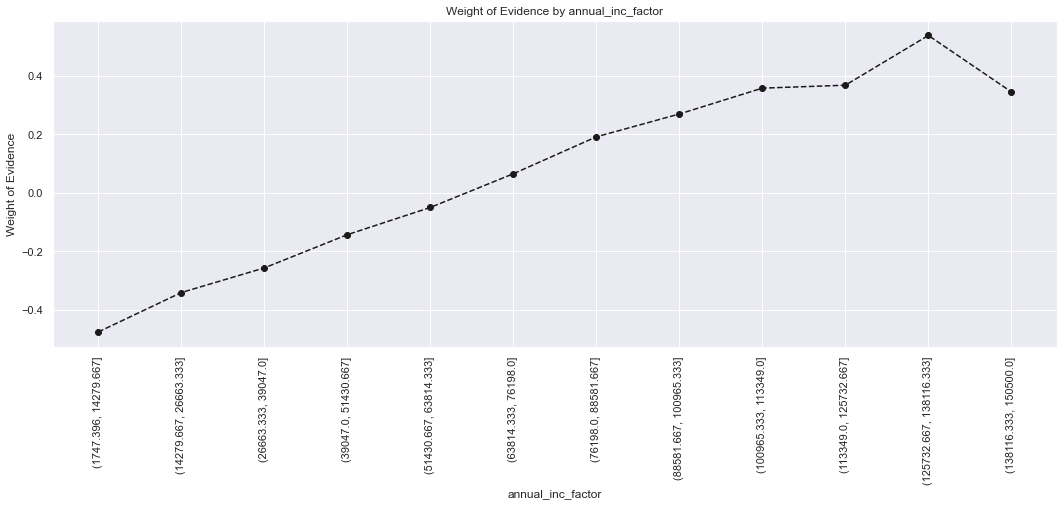

In [43]:
plot_by_woe(df_temp, 90)

##### dti

In [44]:
# fine-classing
X_train_prepr['dti_factor'] = pd.cut(X_train_prepr['dti'], 10)
# Process 'annual_inc_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_discrete(X_train_prepr, 'dti_factor', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
dti_factor,,,,
"(-0.04, 3.999]",0.030313,0.036496,0.185616,0.025864
"(3.999, 7.998]",0.072939,0.094259,0.256430,0.025864
"(7.998, 11.997]",0.125349,0.151592,0.190086,0.025864
"(11.997, 15.996]",0.166479,0.184973,0.105343,0.025864
"(15.996, 19.995]",0.185388,0.179995,-0.029521,0.025864
"(19.995, 23.994]",0.171752,0.149789,-0.136822,0.025864
"(23.994, 27.993]",0.126796,0.105425,-0.184580,0.025864
"(27.993, 31.992]",0.079561,0.062991,-0.233526,0.025864
"(31.992, 35.991]",0.035096,0.028710,-0.200840,0.025864


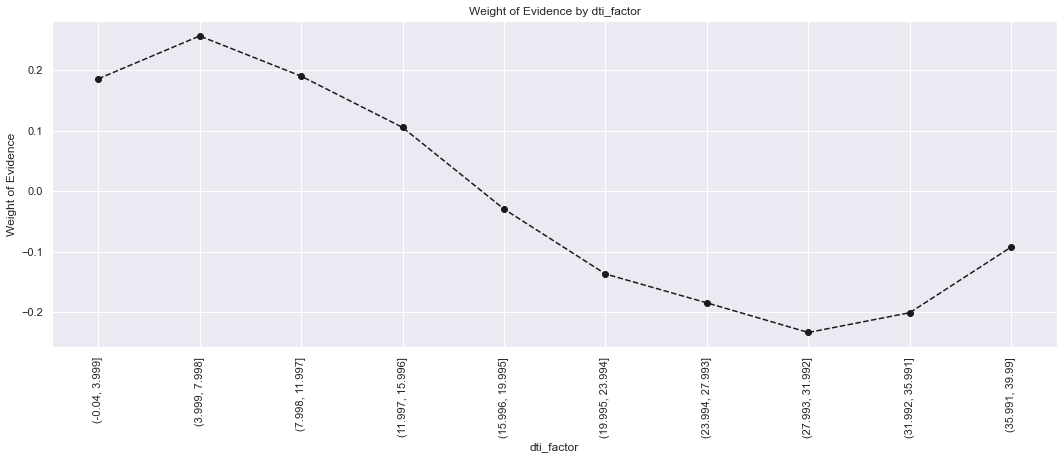

In [45]:
plot_by_woe(df_temp, 90)

In [46]:
X_train_prepr['inq_last_6mths_factor'] = pd.cut(X_train_prepr['inq_last_6mths'], 7)

df_temp = woe_discrete(
    X_train_prepr, 'inq_last_6mths_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
inq_last_6mths_factor,,,,
"(-0.033, 4.714]",0.982291,0.991491,0.009322,0.007072
"(4.714, 9.429]",0.017046,0.008353,-0.713368,0.007072
"(9.429, 14.143]",0.000441,0.000114,-1.350648,0.007072
"(14.143, 18.857]",0.000123,0.000024,-1.627859,0.007072
"(18.857, 23.571]",0.000025,0.000003,-2.097862,0.007072
"(23.571, 28.286]",0.000025,0.000012,-0.711568,0.007072
"(28.286, 33.0]",0.000049,0.000003,-2.791010,0.007072


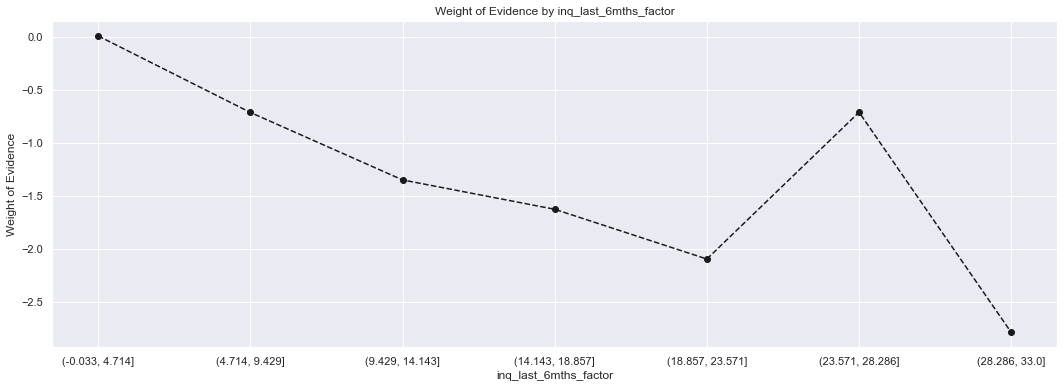

In [47]:
plot_by_woe(df_temp)

We will drop this feature

In [48]:
# Initial examination shows that there are some obs with utilization of >1 times which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['revol_util'] <= 1].copy()
# fine-classing
X_train_prepr_temp['revol_util_factor'] = pd.cut(
    X_train_prepr_temp['revol_util'], 10)
# preprocess 'revol_util'
df_temp = woe_discrete(
    X_train_prepr_temp, 'revol_util_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
revol_util_factor,,,,
"(-0.001, 0.1]",0.752161,0.643643,-0.155806,0.090671
"(0.1, 0.2]",0.051873,0.051233,-0.012411,0.090671
"(0.2, 0.3]",0.023055,0.048577,0.745275,0.090671
"(0.3, 0.4]",0.037464,0.037192,-0.007296,0.090671
"(0.4, 0.5]",0.028818,0.037951,0.275271,0.090671
"(0.5, 0.6]",0.014409,0.033776,0.851885,0.090671
"(0.6, 0.7]",0.031700,0.040228,0.238230,0.090671
"(0.7, 0.8]",0.023055,0.039089,0.527974,0.090671
"(0.8, 0.9]",0.023055,0.029981,0.262693,0.090671


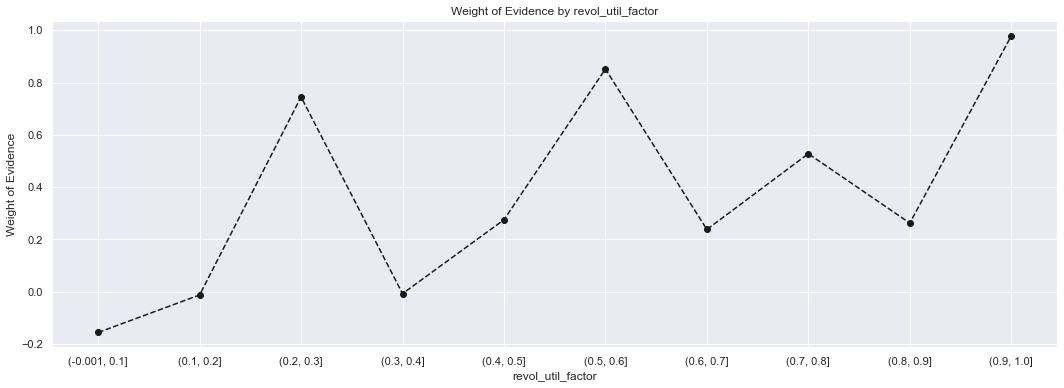

In [49]:
plot_by_woe(df_temp)

In [50]:
# Initial examination shows that there are some obs >50 accounts which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_acc'] <= 50].copy()
# fine-classing
X_train_prepr_temp['total_acc_factor'] = pd.cut(
    X_train_prepr_temp['total_acc'], 24)
# preprocess 'total_acc'
df_temp = woe_discrete(
    X_train_prepr_temp, 'total_acc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
total_acc_factor,,,,
"(0.951, 3.042]",0.002320,0.001149,-0.702454,0.008127
"(3.042, 5.083]",0.010921,0.008338,-0.269843,0.008127
"(5.083, 7.125]",0.022169,0.018105,-0.202524,0.008127
"(7.125, 9.167]",0.035006,0.030161,-0.148979,0.008127
"(9.167, 11.208]",0.048550,0.042947,-0.122616,0.008127
"(11.208, 13.25]",0.059294,0.054171,-0.090358,0.008127
"(13.25, 15.292]",0.068499,0.063348,-0.078186,0.008127
"(15.292, 17.333]",0.073871,0.070219,-0.050703,0.008127
"(17.333, 19.375]",0.076015,0.073466,-0.034116,0.008127


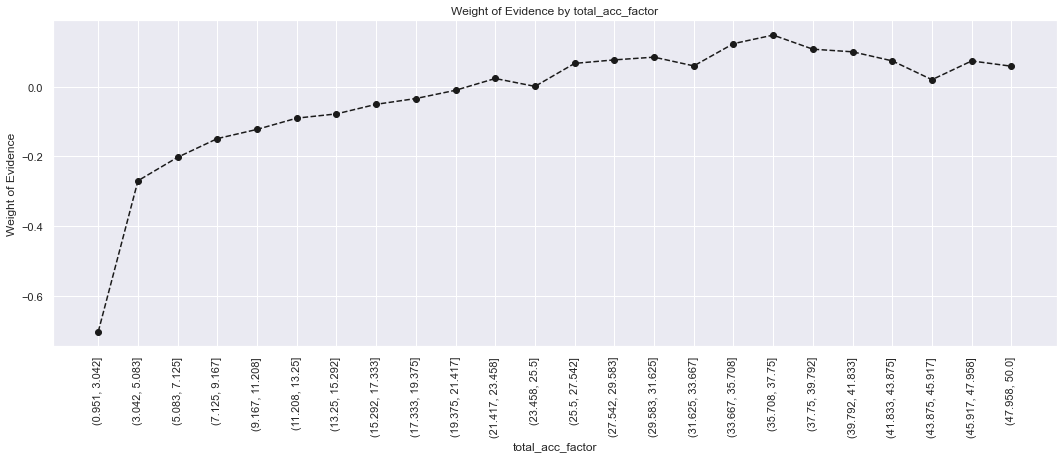

In [51]:
plot_by_woe(df_temp,90)

The feature will be dropped bacuse of its low IV value

In [52]:
# Initial examination shows that there are some obs >50 accounts which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['collection_recovery_fee'] <= 1000].copy(
)
# fine-classing
X_train_prepr_temp['collection_recovery_fee_factor'] = pd.cut(
    X_train_prepr_temp['collection_recovery_fee'], 10)
# preprocess 'total_acc'
df_temp = woe_discrete(
    X_train_prepr_temp, 'collection_recovery_fee_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


/home/main/Documents/kazispaces/dsrc/py/finlytik-app/fin/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


good_bad,0,1,woe,iv
collection_recovery_fee_factor,,,,
"(-0.999, 99.923]",0.847102,1.0,0.165934,inf
"(99.923, 199.845]",0.035923,0.0,-inf,inf
"(199.845, 299.768]",0.028530,0.0,-inf,inf
"(299.768, 399.691]",0.024486,0.0,-inf,inf
"(399.691, 499.613]",0.018557,0.0,-inf,inf
"(499.613, 599.536]",0.014364,0.0,-inf,inf
"(599.536, 699.459]",0.011065,0.0,-inf,inf
"(699.459, 799.381]",0.008410,0.0,-inf,inf
"(799.381, 899.304]",0.006649,0.0,-inf,inf


The feature will be dropped bacuse of its unknown IV value

In [53]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 26 categories by its values.
X_train_prepr['out_prncp_factor'] = pd.cut(X_train_prepr['out_prncp'], 26)
# We calculate weight of evidence.
df_temp = woe_discrete(
    X_train_prepr, 'out_prncp_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
out_prncp_factor,,,,
"(-32.16, 1236.938]",0.853019,0.485177,-0.564268,0.686832
"(1236.938, 2473.875]",0.010055,0.055154,1.702009,0.686832
"(2473.875, 3710.813]",0.014421,0.060478,1.433594,0.686832
"(3710.813, 4947.751]",0.013121,0.051256,1.362610,0.686832
"(4947.751, 6184.688]",0.012802,0.042621,1.202724,0.686832
"(6184.688, 7421.626]",0.010669,0.037673,1.261642,0.686832
"(7421.626, 8658.564]",0.009957,0.036887,1.309563,0.686832
"(8658.564, 9895.502]",0.010031,0.036379,1.288316,0.686832
"(9895.502, 11132.439]",0.009957,0.029589,1.089088,0.686832


The IV appears to be slightly higher than the recommended threshold (>0.5) but let's proceed nevertheless.

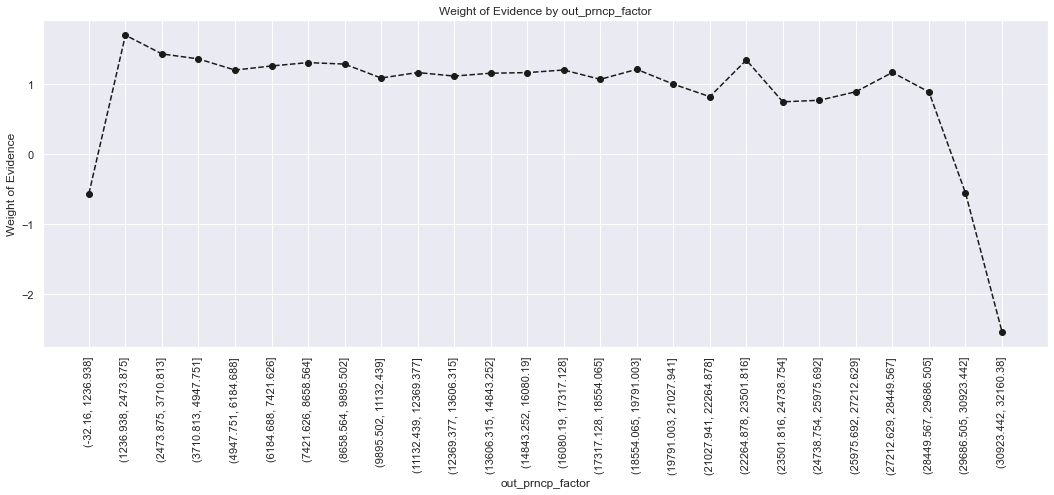

In [54]:
plot_by_woe(df_temp, 90)

In [55]:
# Initial examination shows that there are vey few obs with >25,000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_pymnt'] <= 30000].copy(
)
# fine-classing
X_train_prepr_temp['total_pymnt_factor'] = pd.cut(
    X_train_prepr_temp['total_pymnt'], 20)
# preprocess 'total_acc'
df_temp = woe_discrete(
    X_train_prepr_temp, 'total_pymnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
total_pymnt_factor,,,,
"(-30.0, 1500.0]",0.095542,0.013281,-1.973264,0.581289
"(1500.0, 3000.0]",0.158489,0.051487,-1.124361,0.581289
"(3000.0, 4500.0]",0.159401,0.089564,-0.576475,0.581289
"(4500.0, 6000.0]",0.136792,0.108177,-0.234694,0.581289
"(6000.0, 7500.0]",0.105553,0.109295,0.034846,0.581289
"(7500.0, 9000.0]",0.084299,0.094839,0.117814,0.581289
"(9000.0, 10500.0]",0.064056,0.082564,0.253811,0.581289
"(10500.0, 12000.0]",0.047857,0.084474,0.568217,0.581289
"(12000.0, 13500.0]",0.035702,0.067411,0.635610,0.581289


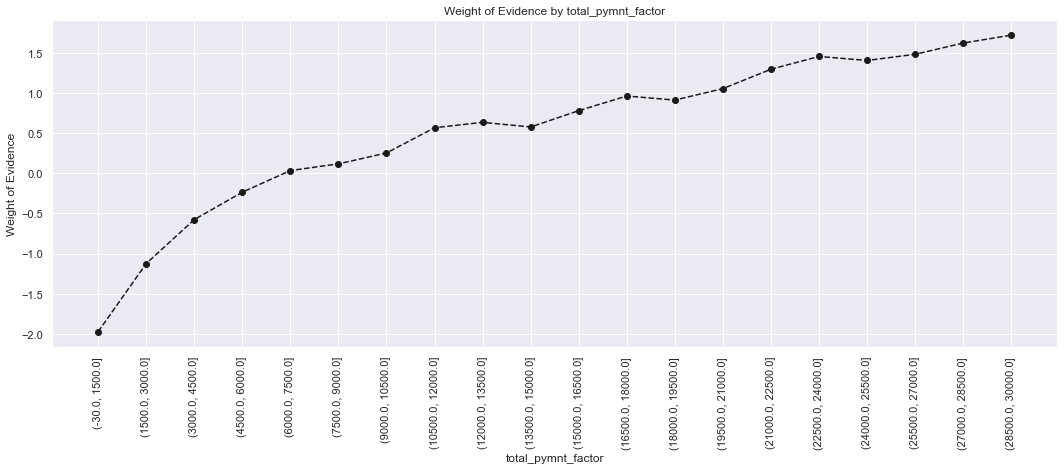

In [56]:
plot_by_woe(df_temp,90)

In [57]:
# Again, because of very few obs > 64,000, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['tot_cur_bal'] <= 64000].copy(
)
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(
    X_train_prepr_temp['tot_cur_bal'], 25)
# preprocess
df_temp = woe_discrete(
    X_train_prepr_temp, 'tot_cur_bal_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
tot_cur_bal_factor,,,,
"(-64.0, 2560.0]",0.010492,0.012617,0.184381,0.00311
"(2560.0, 5120.0]",0.028748,0.032600,0.125727,0.00311
"(5120.0, 7680.0]",0.040090,0.045531,0.127273,0.00311
"(7680.0, 10240.0]",0.051007,0.052347,0.025927,0.00311
"(10240.0, 12800.0]",0.056041,0.055224,-0.014688,0.00311
"(12800.0, 15360.0]",0.059195,0.057739,-0.024894,0.00311
"(15360.0, 17920.0]",0.056647,0.058234,0.027633,0.00311
"(17920.0, 20480.0]",0.061984,0.058046,-0.065652,0.00311
"(20480.0, 23040.0]",0.059680,0.057087,-0.044422,0.00311


The feature will be ignored for its low IV value

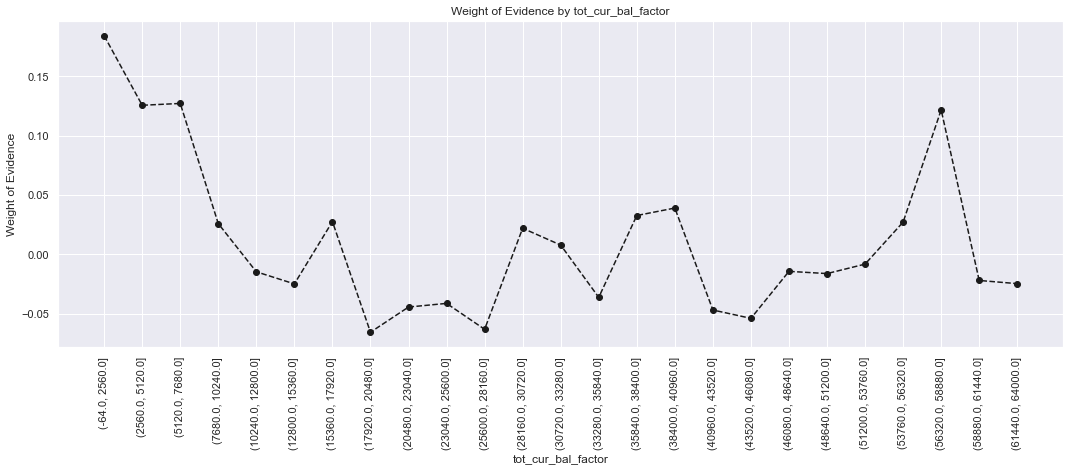

In [58]:
plot_by_woe(df_temp, 90)

In [59]:
# initial examination reveals very few obs > 79,780, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_rev_hi_lim'] <= 79750].copy(
)
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(
    X_train_prepr_temp['total_rev_hi_lim'], 25)
# preprocess
df_temp = woe_discrete(
    X_train_prepr_temp, 'total_rev_hi_lim_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
total_rev_hi_lim_factor,,,,
"(-79.711, 3188.44]",0.015309,0.011419,-0.293177,0.022196
"(3188.44, 6376.88]",0.056080,0.047509,-0.165866,0.022196
"(6376.88, 9565.32]",0.090446,0.080398,-0.117768,0.022196
"(9565.32, 12753.76]",0.106108,0.094771,-0.112990,0.022196
"(12753.76, 15942.2]",0.107453,0.097615,-0.096023,0.022196
"(15942.2, 19130.64]",0.100086,0.092020,-0.084033,0.022196
"(19130.64, 22319.08]",0.085258,0.082592,-0.031762,0.022196
"(22319.08, 25507.52]",0.075489,0.073139,-0.031626,0.022196
"(25507.52, 28695.96]",0.061333,0.062056,0.011716,0.022196


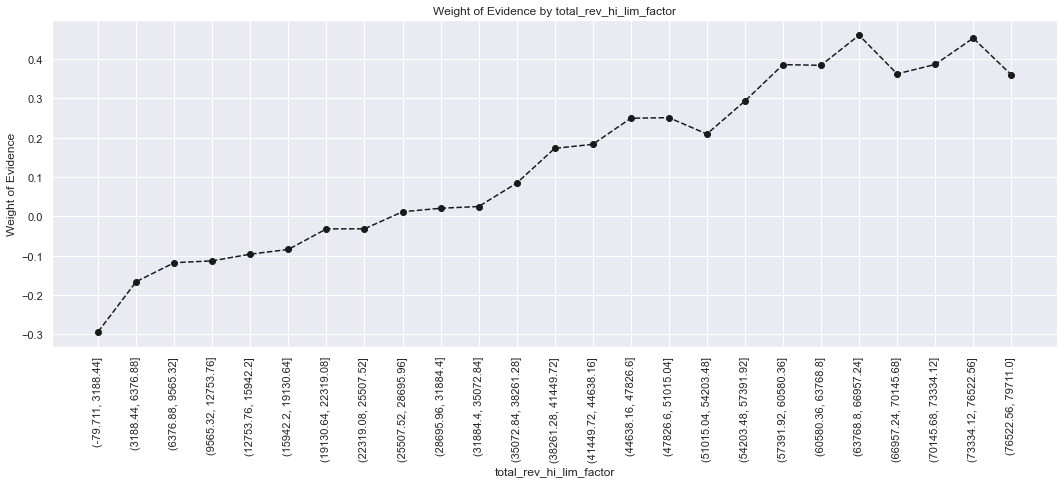

In [60]:
plot_by_woe(df_temp, 90)

In [61]:
# fine-classing
X_train_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(
    X_train_prepr['mths_since_earliest_cr_line'], 50)
# preprocess
df_temp = woe_discrete(
    X_train_prepr, 'mths_since_earliest_cr_line_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
mths_since_earliest_cr_line_factor,,,,
"(121.486, 132.28]",0.001987,0.002315,0.152779,0.016961
"(132.28, 142.56]",0.004832,0.004825,-0.001434,0.016961
"(142.56, 152.84]",0.008462,0.006182,-0.313863,0.016961
"(152.84, 163.12]",0.012607,0.010460,-0.186736,0.016961
"(163.12, 173.4]",0.021903,0.017611,-0.218081,0.016961
"(173.4, 183.68]",0.030929,0.023077,-0.292842,0.016961
"(183.68, 193.96]",0.034117,0.028303,-0.186857,0.016961
"(193.96, 204.24]",0.038238,0.033260,-0.139477,0.016961
"(204.24, 214.52]",0.041451,0.038121,-0.083749,0.016961


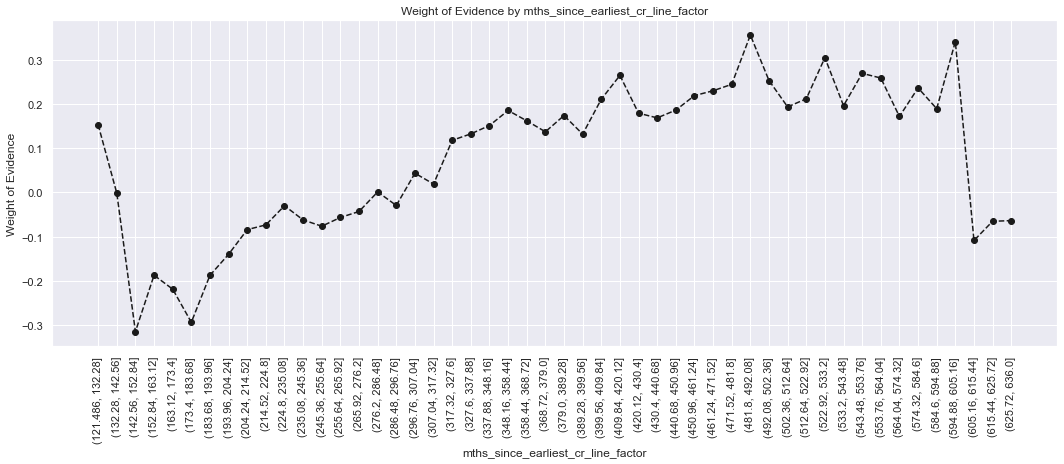

In [62]:
plot_by_woe(df_temp, 90)

The IV is borderline close to the minimum ideal threshold, so we will use the feature

In [63]:
# fine-classing
X_train_prepr['mths_since_issue_d_factor'] = pd.cut(
    X_train_prepr['mths_since_issue_d'], 24)
# preprocess
df_temp = woe_discrete(
    X_train_prepr, "mths_since_issue_d_factor", y_train_prepr)
df_temp


good_bad,0,1,woe,iv
mths_since_issue_d_factor,,,,
"(84.91, 88.75]",0.109334,0.190839,0.557019,0.107808
"(88.75, 92.5]",0.143645,0.185331,0.254796,0.107808
"(92.5, 96.25]",0.130328,0.143992,0.099704,0.107808
"(96.25, 100.0]",0.123437,0.121765,-0.013632,0.107808
"(100.0, 103.75]",0.089395,0.074876,-0.177228,0.107808
"(103.75, 107.5]",0.096606,0.073468,-0.273789,0.107808
"(107.5, 111.25]",0.073061,0.052869,-0.323478,0.107808
"(111.25, 115.0]",0.063202,0.040171,-0.453189,0.107808
"(115.0, 118.75]",0.029161,0.019268,-0.414357,0.107808


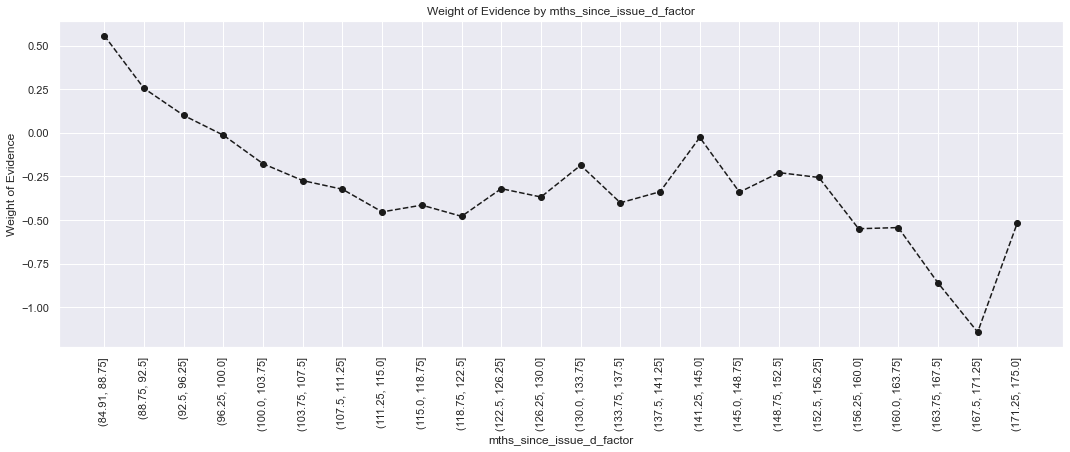

In [64]:
plot_by_woe(df_temp, 90)

In [65]:
# fine-classing
X_train_prepr['pub_rec_factor'] = pd.cut(
    X_train_prepr['pub_rec'], 2)
# preprocess
df_temp = woe_discrete(
    X_train_prepr, "pub_rec_factor", y_train_prepr)
df_temp


good_bad,0,1,woe,iv
pub_rec_factor,,,,
"(-0.049, 24.5]",1.0,0.999994,-0.000006,inf
"(24.5, 49.0]",0.0,0.000006,inf,inf


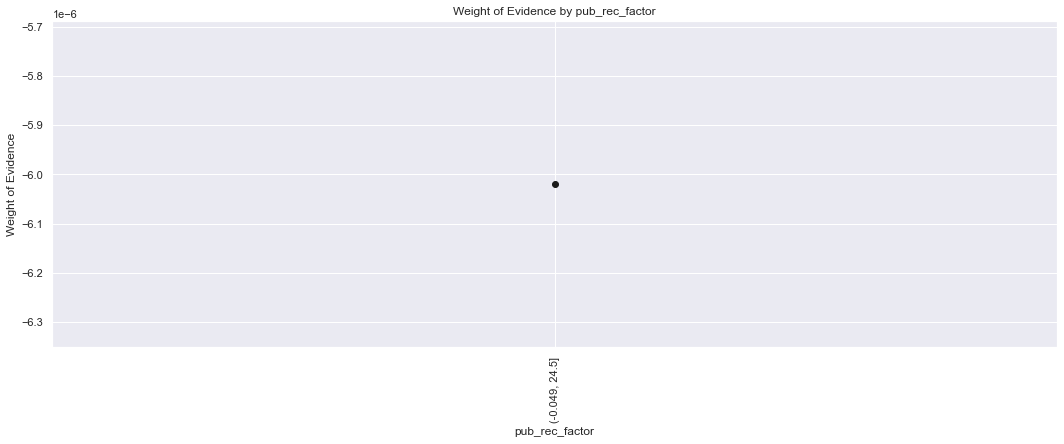

In [66]:
plot_by_woe(df_temp, 90)

We drop the feature due to the low IV

In [67]:
# filter out all values > 75 given the low obs
#X_train_prepr_temp = X_train_prepr[X_train_prepr['mths_since_last_credit_pull_d'] <= 75].copy()
# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories
X_train_prepr['mths_since_last_credit_pull_d_factor'] = pd.cut(X_train_prepr['mths_since_last_credit_pull_d'], 10)
# Calculate WoE
df_temp = woe_discrete(
    X_train_prepr, "mths_since_last_credit_pull_d_factor", y_train_prepr[X_train_prepr.index])
df_temp


good_bad,0,1,woe,iv
mths_since_last_credit_pull_d_factor,,,,
"(71.896, 82.4]",0.714944,0.882087,0.210085,0.18743
"(82.4, 92.8]",0.146379,0.062316,-0.853981,0.18743
"(92.8, 103.2]",0.081529,0.028830,-1.039548,0.18743
"(103.2, 113.6]",0.031812,0.013087,-0.888185,0.18743
"(113.6, 124.0]",0.012803,0.006848,-0.625780,0.18743
"(124.0, 134.4]",0.006156,0.004355,-0.346053,0.18743
"(134.4, 144.8]",0.003483,0.001577,-0.792183,0.18743
"(144.8, 155.2]",0.002232,0.000587,-1.335707,0.18743
"(155.2, 165.6]",0.000638,0.000138,-1.527303,0.18743


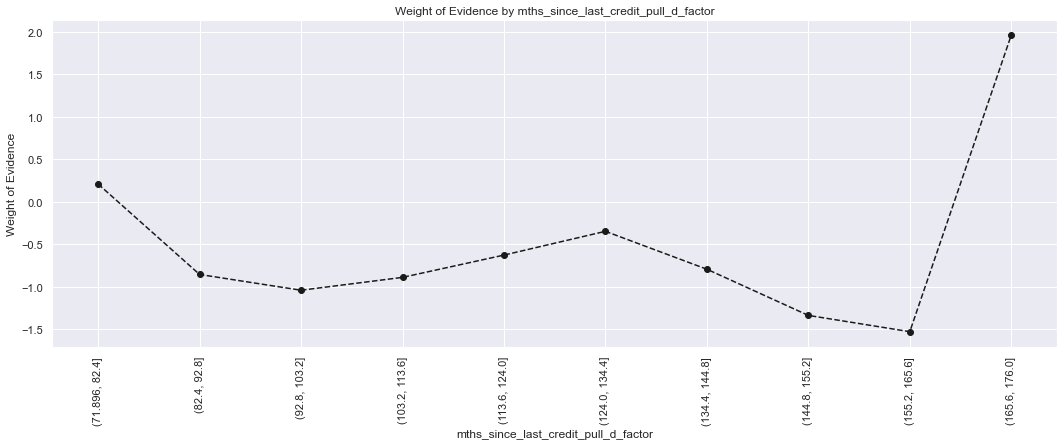

In [68]:
plot_by_woe(df_temp, 90)

In [69]:
X_train_prepr.columns

Index(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'inq_last_6mths',
       'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'collection_recovery_fee', 'tot_cur_bal', 'total_rev_hi_lim',
       'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d',
       'int_rate_factor', 'dti_factor', 'inq_last_6mths_factor',
       'out_prncp_factor', 'mths_since_earliest_cr_line_factor',
       'mths_since_issue_d_factor', 'pub_rec_factor',
       'mths_since_last_credit_pull_d_factor'],
      dtype='object')

The features to use:
1. grade
2. home_ownership
3. verification_status
4. purpose
5. term
6. int_rate
7. annual_inc
8. dti
9. revol_util
10. out_prncp
11. total_pymnt
12. total_rev_hi_lim
13. mths_since_earliest_cr_line
14. mths_since_issue_d
15. mths_since_last_credit_pull_d


### Preprocessing

In [112]:
X_train = X_train[['grade', 'home_ownership', 'verification_status', 'purpose', 'term', 'int_rate', 'annual_inc', 'dti','revol_util', 'out_prncp', 'total_pymnt', 'total_rev_hi_lim', 'mths_since_earliest_cr_line', 'mths_since_issue_d', 'mths_since_last_credit_pull_d']]
X_test = X_test[['grade', 'home_ownership', 'verification_status', 'purpose', 'term', 'int_rate', 'annual_inc', 'dti','revol_util', 'out_prncp', 'total_pymnt', 'total_rev_hi_lim', 'mths_since_earliest_cr_line', 'mths_since_issue_d', 'mths_since_last_credit_pull_d']]

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [77]:
import logging

In [106]:
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self):  # no *args or *kargs
        self.woe_grade = None
        self.woe_home = None
        self.woe_verStatus = None
        self.woe_purpose = None
        self.woe_term = None
        self.woe_int_rate = None
        self.woe_annInc = None
        self.woe_dti = None
        self.woe_revolUtil = None
        self.woe_outPrncp = None
        self.woe_totalPymnt = None
        self.woe_totalRev = None
        self.woe_mthsECL = None
        self.woe_mthsID = None
        self.woe_mthsLCP = None

    def fit(self, X, y):
        logging.basicConfig(filename='./app.log', filemode='w',
                            format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S', level=logging.INFO)
        newX = X.copy()
        # grade woe calculation
        self.woe_grade = self.woe(data.drop('good_bad', axis=1), 'grade', y)

        # home_ownership woe calculation
        self.woe_home = self.woe(data.drop('good_bad', axis=1), 'home_ownership', y)

        # verification_status woe calculation
        self.woe_verStatus = self.woe(data.drop('good_bad', axis=1), 'verification_status', y)

        # purpose woe calculation
        self.woe_purpose = self.woe(data.drop('good_bad', axis=1), 'purpose', y)

        # term woe calculation
        self.woe_term = self.woe(data.drop('good_bad', axis=1), 'term', y)


        # int_rate woe calculation
        # fine-classing using the 'cut' method, given the large number of unique values
        newX['int_rate_factor'] = pd.cut(newX['int_rate'], 50, right=False)
        # Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
        self.woe_int_rate = self.woe(newX, 'int_rate_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_int_rate.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_int_rate.index[0].right, closed='left')
        self.woe_int_rate = self.woe_int_rate.reset_index()[['int_rate_factor', 'woe']].to_dict(orient='list')
        self.woe_int_rate['int_rate_factor'][0] = iv_start
        self.woe_int_rate['int_rate_factor'][-1] = iv_end
        self.woe_int_rate = pd.DataFrame(self.woe_int_rate)


        # annual_inc woe calculation
        # Initial examination shows that there are too few individuals with large income (up to $75m!!) and too many with small income.
        # Since 95.6% of observations have income < 151,858, we will have one category for more than 150K, and we are going to apply our approach to determine
        # the categories of everyone with 150k or less.
        new_X_temp = newX[newX['annual_inc'] <= 150500].copy()
        # fine-classing again
        new_X_temp['annual_inc_factor'] = pd.cut(new_X_temp['annual_inc'], 12)
        # make sure to select only the relevant indexes in the target column
        self.woe_annInc = woe_discrete(new_X_temp, 'annual_inc_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_annInc.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_annInc.index[0].right, closed='left')
        self.woe_annInc = self.woe_annInc.reset_index()[['annual_inc_factor', 'woe']].to_dict(orient='list')
        self.woe_annInc['annual_inc_factor'][0] = iv_start
        self.woe_annInc['annual_inc_factor'][-1] = iv_end
        self.woe_annInc = pd.DataFrame(self.woe_annInc)

        # dti woe calculation
        # fine-classing
        newX['dti_factor'] = pd.cut(newX['dti'], 10)
        # Process 'dti_factor' column through woe_ordered_continuous and plot_by_woe functions
        self.woe_dti = self.woe(newX, 'dti_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_dti.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_dti.index[0].right, closed='left')
        self.woe_dti = self.woe_dti.reset_index()[['dti_factor', 'woe']].to_dict(orient='list')
        self.woe_dti['dti_factor'][0] = iv_start
        self.woe_dti['dti_factor'][-1] = iv_end
        self.woe_dti = pd.DataFrame(self.woe_dti)
        
        # revol_util woe calculation
        # Initial examination shows that there are some obs with utilization of >1 times which should be very rare, so we will filter them out first
        new_X_temp = newX[newX['revol_util'] <= 1].copy()
        # fine-classing
        new_X_temp['revol_util_factor'] = pd.cut(new_X_temp['revol_util'], 10)
        # preprocess 'revol_util'
        self.woe_revolUtil = self.woe(new_X_temp, 'revol_util_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_revolUtil.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_revolUtil.index[0].right, closed='left')
        self.woe_revolUtil = self.woe_revolUtil.reset_index()[['revol_util_factor', 'woe']].to_dict(orient='list')
        self.woe_revolUtil['revol_util_factor'][0] = iv_start
        self.woe_revolUtil['revol_util_factor'][-1] = iv_end
        self.woe_revolUtil = pd.DataFrame(self.woe_revolUtil)

        # out_prncp woe calculation
        # Here we do fine-classing: using the 'cut' method, we split the variable into 26 categories by its values.
        newX['out_prncp_factor'] = pd.cut(newX['out_prncp'], 26)
        # We calculate weight of evidence.
        self.woe_outPrncp = woe_discrete(newX, 'out_prncp_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_outPrncp.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_outPrncp.index[0].right, closed='left')
        self.woe_outPrncp = self.woe_outPrncp.reset_index()[['out_prncp_factor', 'woe']].to_dict(orient='list')
        self.woe_outPrncp['out_prncp_factor'][0] = iv_start
        self.woe_outPrncp['out_prncp_factor'][-1] = iv_end
        self.woe_outPrncp = pd.DataFrame(self.woe_outPrncp)

        # total_pymnt woe calculation
        # Initial examination shows that there are vey few obs with >25,000 which should be very rare, so we will filter them out first
        new_X_temp = X_train_prepr[X_train_prepr['total_pymnt'] <= 30000].copy()
        # fine-classing
        new_X_temp['total_pymnt_factor'] = pd.cut(new_X_temp['total_pymnt'], 20)
        # preprocess 'total_pymnt'
        self.woe_totalPymnt = self.woe(new_X_temp, 'total_pymnt_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_totalPymnt.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_totalPymnt.index[0].right, closed='left')
        self.woe_totalPymnt = self.woe_totalPymnt.reset_index()[['total_pymnt_factor', 'woe']].to_dict(orient='list')
        self.woe_totalPymnt['total_pymnt_factor'][0] = iv_start
        self.woe_totalPymnt['total_pymnt_factor'][-1] = iv_end
        self.woe_totalPymnt = pd.DataFrame(self.woe_totalPymnt)

        # total_rev_hi_lim woe calculation
        # initial examination reveals very few obs > 79,780, we will filter them out first
        new_X_temp = newX[newX['total_rev_hi_lim'] <= 79750].copy()
        # fine-classing
        new_X_temp['total_rev_hi_lim_factor'] = pd.cut(new_X_temp['total_rev_hi_lim'], 25)
        # preprocess
        self.woe_totalRev = self.woe(new_X_temp, 'total_rev_hi_lim_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_totalRev.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_totalRev.index[0].right, closed='left')
        self.woe_totalRev = self.woe_totalRev.reset_index()[['total_rev_hi_lim_factor', 'woe']].to_dict(orient='list')
        self.woe_totalRev['total_rev_hi_lim_factor'][0] = iv_start
        self.woe_totalRev['total_rev_hi_lim_factor'][-1] = iv_end
        self.woe_totalRev = pd.DataFrame(self.woe_totalRev)

        # mths_since_earliest_cr_line woe calculation
        # fine-classing
        newX['mths_since_earliest_cr_line_factor'] = pd.cut(newX['mths_since_earliest_cr_line'], 50)
        # preprocess
        self.woe_mthsECL = self.woe(newX, 'mths_since_earliest_cr_line_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_mthsECL.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_mthsECL.index[0].right, closed='left')
        self.woe_mthsECL = self.woe_mthsECL.reset_index()[['mths_since_earliest_cr_line_factor', 'woe']].to_dict(orient='list')
        self.woe_mthsECL['mths_since_earliest_cr_line_factor'][0] = iv_start
        self.woe_mthsECL['mths_since_earliest_cr_line_factor'][-1] = iv_end
        self.woe_mthsECL = pd.DataFrame(self.woe_mthsECL)

        # mths_since_issue_d woe calculation
        # fine-classing
        newX['mths_since_issue_d_factor'] = pd.cut(newX['mths_since_issue_d'], 24)
        # preprocess
        self.woe_mthsID = self.woe(newX, "mths_since_issue_d_factor", y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_mthsID.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_mthsID.index[0].right, closed='left')
        self.woe_mthsID = self.woe_mthsID.reset_index()[['mths_since_issue_d_factor', 'woe']].to_dict(orient='list')
        self.woe_mthsID['mths_since_issue_d_factor'][0] = iv_start
        self.woe_mthsID['mths_since_issue_d_factor'][-1] = iv_end
        self.woe_mthsID = pd.DataFrame(self.woe_mthsID)
        
        # mths_since_last_credit_pull_d
        # filter out all values > 75 given the low obs
        #X_train_prepr_temp = X_train_prepr[X_train_prepr['mths_since_last_credit_pull_d'] <= 75].copy()
        # Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories
        newX['mths_since_last_credit_pull_d_factor'] = pd.cut(newX['mths_since_last_credit_pull_d'], 10)
        # Calculate WoE
        self.woe_mthsLCP = self.woe(newX, "mths_since_last_credit_pull_d_factor", y[newX.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(left=self.woe_mthsLCP.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(left=0, right=self.woe_mthsLCP.index[0].right, closed='left')
        self.woe_mthsLCP = self.woe_mthsLCP.reset_index()[['mths_since_last_credit_pull_d_factor', 'woe']].to_dict(orient='list')
        self.woe_mthsLCP['mths_since_last_credit_pull_d_factor'][0] = iv_start
        self.woe_mthsLCP['mths_since_last_credit_pull_d_factor'][-1] = iv_end
        self.woe_mthsLCP = pd.DataFrame(self.woe_mthsLCP)

        return self

    def transform(self, X):
        newX = X.copy()

        # grade Processing
        newX.replace({'grade': self.woe_grade[['woe']].to_dict()['woe']}, inplace=True)
            
        # home_ownership processing
        newX.replace({'home_ownership': self.woe_home[['woe']].to_dict()['woe']}, inplace=True)
        
        # verification_status processing
        newX.replace({'verification_status': self.woe_verStatus[['woe']].to_dict()['woe']}, inplace=True)

        # purpose processing
        newX.replace({'purpose': self.woe_purpose[['woe']].to_dict()['woe']}, inplace=True)

        # term processing
        newX.replace({'term': self.woe_term[['woe']].to_dict()['woe']}, inplace=True)


        # int_rate processing
        logging.info('int_rate processing...started')
        newX['int_rate'] = self.replace_woe(newX['int_rate'], self.woe_int_rate, 'int_rate_factor')
        logging.info('int_rate processing...end')

        # annual_inc processing
        logging.info('annual_inc processing...started')
        newX['annual_inc'] = self.replace_woe(newX['annual_inc'], self.woe_annInc, 'annual_inc_factor')
        logging.info('annual_inc processing...end')

        # dti processing
        logging.info('dti processing...started')
        newX['dti'] = self.replace_woe(newX['dti'], self.woe_dti, 'dti_factor')
        logging.info('dti processing...end')

        # revol_util processing
        logging.info('revol_util processing...started')
        newX['revol_util'] = self.replace_woe(newX['revol_util'], self.woe_revolUtil, 'revol_util_factor')
        logging.info('revol_util processing...end')

        # out_prncp processing
        logging.info('out_prncp processing...started')
        newX['out_prncp'] = self.replace_woe(newX['out_prncp'], self.woe_outPrncp, 'out_prncp_factor')
        logging.info('out_prncp processing...end')

        # total_pymnt processing
        logging.info('total_pymnt processing...started')
        newX['total_pymnt'] = self.replace_woe(newX['total_pymnt'], self.woe_totalPymnt, 'total_pymnt_factor')
        logging.info('total_pymnt processing...end')

        # total_rev_hi_lim
        logging.info('total_rev_hi_lim...started')
        newX['total_rev_hi_lim'] = self.replace_woe(newX['total_rev_hi_lim'], self.woe_totalRev, 'total_rev_hi_lim_factor')
        logging.info('total_rev_hi_lim...end')

        # mths_since_earliest_cr_line
        logging.info('mths_since_earliest_cr_line...started')
        newX['mths_since_earliest_cr_line'] = self.replace_woe(newX['mths_since_earliest_cr_line'], self.woe_mthsECL, 'mths_since_earliest_cr_line_factor')
        logging.info('mths_since_earliest_cr_line...end')

        # mths_since_issue_d
        logging.info('mths_since_issue_d...started')
        newX['mths_since_issue_d'] = self.replace_woe(newX['mths_since_issue_d'], self.woe_mthsID, 'mths_since_issue_d_factor')
        logging.info('mths_since_issue_d...end')
        
        # mths_since_last_credit_pull_d
        logging.info('mths_since_last_credit_pull_d...started')
        newX['mths_since_last_credit_pull_d_factor'] = self.replace_woe(newX['mths_since_last_credit_pull_d'], self.woe_mthsLCP, 'mths_since_last_credit_pull_d_factor')
        logging.info('mths_since_last_credit_pull_d...end')

        return newX

    def woe(self, df, cat_variabe_name, y_df):
        """
        woe(weight of evidence) function
        """

        df = pd.concat([df[cat_variabe_name], y_df], axis=1)
        df_woe_iv = pd.crosstab(df[cat_variabe_name], df['good_bad'], normalize='columns').assign(
        woe=lambda dfx: np.log(dfx[1]/dfx[0])).assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0])))
        return df_woe_iv


    def replace_woe(self, col, woe_sheet, name):
        woe_t = []
        arr_iv = pd.arrays.IntervalArray(woe_sheet[name], closed='left')
        for i in col.values:
            idx = np.argwhere(arr_iv.contains(i)).ravel()[0]
            woe_t.append(woe_sheet.iloc[idx]['woe'])
        return woe_t


In [107]:
woe_p = WoE_Binning()

In [84]:
X_train.fillna(X_train.mean(axis=0), inplace=True, axis=0)
X_test.fillna(X_test.mean(axis=0), inplace=True, axis=0)


/tmp/ipykernel_949965/714854530.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train_prepr.fillna(X_train_prepr.mean(axis=0), inplace=True, axis=0)


In [108]:
woe_p.fit(X_train, y_train)

WoE_Binning()

In [113]:
woe_p.fit_transform(X_train, y_train)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [109]:
X_train_b = woe_p.transform(X_train)

In [ ]:
num_pipe = Pipeline([
    ('binning', )
    ('scaler_1', RobustScaler()),
    ('scaler_2', MinMaxScaler())
])

In [110]:
X_train_t = num_pipe.fit_transform(X_train)

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,collection_recovery_fee,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,int_rate_factor,dti_factor,inq_last_6mths_factor,out_prncp_factor,mths_since_earliest_cr_line_factor,mths_since_issue_d_factor,pub_rec_factor,mths_since_last_credit_pull_d_factor
456615,36,0.634735,1.116232,7.0,0.146272,0.191223,0.052726,0.263385,-0.029521,0.0,0.0,0.978369,32.0,-0.564268,0.963482,0.00,143586.000000,0.084397,0.019056,0.099704,79.0,72.0,"[8.722, 9.135)","(15.996, 19.995]","(-0.033, 4.714]","(-32.16, 1236.938]","(307.04, 317.32]","(92.5, 96.25]","(-0.049, 24.5]",0.210085
451541,60,-0.497261,-0.397915,10.0,-0.003605,-0.143110,-0.178691,-0.268581,-0.136822,1.0,0.0,0.978369,25.0,1.202724,-0.234694,0.00,180443.000000,0.172924,0.117766,0.099704,72.0,72.0,"[18.217, 18.63)","(19.995, 23.994]","(-0.033, 4.714]","(4947.751, 6184.688]","(317.32, 327.6]","(92.5, 96.25]","(-0.049, 24.5]",0.210085
394474,60,-0.601519,-0.397915,3.0,-0.003605,-0.256685,0.052726,0.263385,-0.233526,0.0,0.0,0.978369,22.0,1.288316,0.034846,0.00,34197.000000,-0.112990,0.136980,0.254796,72.0,72.0,"[18.63, 19.042)","(27.993, 31.992]","(-0.033, 4.714]","(8658.564, 9895.502]","(368.72, 379.0]","(88.75, 92.5]","(-0.049, 24.5]",0.210085
110294,36,1.759117,1.116232,3.0,0.146272,-0.256685,0.177128,-0.040346,0.190086,0.0,0.0,0.978369,17.0,-0.564268,0.568217,0.00,77959.000000,-0.112990,-0.061918,-0.177228,76.0,76.0,"[5.833, 6.246)","(7.998, 11.997]","(-0.033, 4.714]","(-32.16, 1236.938]","(235.08, 245.36]","(100.0, 103.75]","(-0.049, 24.5]",0.210085
139343,36,0.057454,0.363975,10.0,0.146272,-0.050062,-0.178691,-0.040346,-0.029521,0.0,0.0,0.978369,31.0,-0.564268,-0.234694,0.00,187370.000000,0.025058,0.193117,-0.273789,95.0,72.0,"[12.025, 12.438)","(15.996, 19.995]","(-0.033, 4.714]","(-32.16, 1236.938]","(502.36, 512.64]","(103.75, 107.5]","(-0.049, 24.5]",0.210085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163633,60,-0.290475,-0.048620,10.0,0.146272,0.191223,-0.178691,-0.040346,0.105343,0.0,0.0,0.978369,22.0,1.167434,0.912880,0.00,29071.000000,0.011716,-0.042848,-0.273789,72.0,72.0,"[16.153, 16.566)","(11.997, 15.996]","(-0.033, 4.714]","(11132.439, 12369.377]","(265.92, 276.2]","(103.75, 107.5]","(-0.049, 24.5]",0.210085
399306,36,0.360196,0.363975,7.0,0.146272,-0.143110,-0.178691,0.263385,-0.136822,0.0,0.0,0.978369,20.0,1.089088,0.577296,0.00,186530.000000,0.249386,-0.076098,0.254796,72.0,72.0,"[12.438, 12.85)","(19.995, 23.994]","(-0.033, 4.714]","(9895.502, 11132.439]","(245.36, 255.64]","(88.75, 92.5]","(-0.049, 24.5]",0.210085
57787,60,-0.023471,-0.048620,0.0,0.146272,0.065087,-0.178691,-0.040346,-0.136822,0.0,0.0,0.978369,24.0,-0.564268,1.721775,0.00,290599.000000,-0.084033,0.132259,-0.013632,77.0,73.0,"[14.089, 14.502)","(19.995, 23.994]","(-0.033, 4.714]","(-32.16, 1236.938]","(327.6, 337.88]","(96.25, 100.0]","(-0.049, 24.5]",0.210085
81641,36,-0.101236,-0.048620,4.0,0.146272,-0.143110,0.177128,-0.040346,0.105343,1.0,0.0,0.978369,9.0,1.433594,0.253811,0.00,27715.000000,-0.096023,-0.218081,-0.013632,72.0,72.0,"[14.914, 15.327)","(11.997, 15.996]","(-0.033, 4.714]","(2473.875, 3710.813]","(163.12, 173.4]","(96.25, 100.0]","(-0.049, 24.5]",0.210085


In [ ]:
import joblib

In [ ]:
joblib.dump(woe_p, './binning.joblib')

In [ ]:
joblib.dump(num_pipe, './num_pipe.joblib')


### Modelling

In [114]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc

In [ ]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean Score:', scores.mean())
    print('Std: ', scores.std())

In [115]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)


1. RandomForestClassifier

In [ ]:
rf_cls = RandomForestClassifier()

scores_rf = cross_val_score(
    rf_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv)
display_scores(scores_rf)


2. MLPClassifier

In [ ]:
mlp_cls = MLPClassifier(random_state=42, max_iter=500)

scores_mlp = cross_val_score(
    mlp_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv)
display_scores(scores_mlp)


3. XGBClassifier

In [ ]:
xgb_cls = XGBClassifier(objective='binary:logistic', eval_metric='error')

scores_xgb = cross_val_score(
    xgb_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv)
display_scores(scores_xgb)